<a href="https://colab.research.google.com/github/sachin2000k/CodeDown-Projects/blob/master/Tensorflow_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding Tensorflow 1.x

In [0]:
import tensorflow.compat.v1 as tf

In [9]:
print(tf.__version__)

2.2.0-rc2


In [0]:
tf.compat.v1.disable_eager_execution() 
# Eager execution: means that the model definitions are dynamic and
#executuion is immediate
'''
Tensorflow 2.x natively supports eager execution ie. there is no need
to define computational graph and execute it 
All models can be dynamically defiend and immediately executed
'''

Tensorflow 1.x is diveided into two seperate parts :
  - definition of Computational graph
  - It's executuion

In [6]:
message = tf.constant('Hello World!')
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print(sess.run(message))
  print(sess.run(message).decode())

b'Hello World!'
Hello World!


# adding two vectors

In [15]:
v1 = tf.constant([1,2,3,4])
v2 = tf.constant([10,11,12,13])
v_add = tf.add(v1,v2)
v_add2 = v1+v2 # just to show it can be added in both the ways

# sessions can be defined in two ways
#first
with tf.Session() as sess1: #Session is a class and sess1 is its object
  print("Session 1")
  print(sess1.run(v_add)) # run() is a method in class Session
  print(sess1.run(v_add2))
#second
sess2 = tf.Session()
print("Session 2 ", sess2)
print(sess2.run(v_add))
print([v1,v2,v_add2])
print(sess2.run([v1,v2,v_add2]))
sess2.close() # remember to close the session if defining ecxplicitly

Session 1
[11 13 15 17]
[11 13 15 17]
Session 2  <tensorflow.python.client.session.Session object at 0x7f12d6e61b70>
[11 13 15 17]
[<tf.Tensor 'Const_11:0' shape=(4,) dtype=int32>, <tf.Tensor 'Const_12:0' shape=(4,) dtype=int32>, <tf.Tensor 'add_10:0' shape=(4,) dtype=int32>]
[array([1, 2, 3, 4], dtype=int32), array([10, 11, 12, 13], dtype=int32), array([11, 13, 15, 17], dtype=int32)]


run(fetches, feed_dict=None, options=None, run_metadata)

In [17]:
#Now if we try to print the session object after it is closed it 
# will give an error
print(sess2.run(v1))

RuntimeError: ignored

- A tensor is an n-dimensional array
- Scalar : 0-D tensor [ ]
- Vector : 1-D Tensor [ D0 ]
- Matrix : 2-D Tensor [ D0 , D1 ]
- Tensors: n-D Tensor [ D0 , D1 , ......D(N-1)]

**THERE ARE THREE TYPES OF TENSORS**
 - Constants :  value cannot be changed
 - Variables : as the name suggests, eg: weights in neural networks
 - Placeholders : values are assigned while the running the graph session. No need of initialization

In [18]:
# EXAMPLES
t1 = tf.constant(0)
t2 = tf.constant([1,2,3])
zero_t  = tf.zeros([2,3], dtype = tf.int32)
print(zero_t.shape)

(2, 3)


In [20]:
ones_t = tf.ones_like(t2) #  Create a ones matrix of same shape as t_2
print(ones_t.shape)

(3,)


In [0]:
# sequences
range_t = tf.linspace(2.0, 5.0, 5) #[2. 2.75, 3.5, 4.25, 5.]
range2 = tf.range(10)

In [33]:
# Random Tensors
t_random = tf.random_normal(shape=[2,3], mean=3.0, stddev=4.0, seed=12)
print(t_random)
with tf.Session() as see:
  print(see.run(t_random))

Tensor("random_normal_2:0", shape=(2, 3), dtype=float32)
[[ 1.2534745   6.37991     2.9527605 ]
 [-0.53760314  2.2588985   3.8478067 ]]


In [40]:
# Varaibles
rand_t = tf.random_uniform([50,50],minval=0,maxval=10,seed =0)
t_a = tf.Variable(rand_t)
weights = tf.Variable(tf.random_normal([100,100],stddev=2))
weights2 = tf.Variable(weights.initialized_value(), name ='w2')

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


In [44]:
# All variable must be initialized initially
intial = tf.global_variables_initializer()
# each variable can be initialized seperately uson tf.Variable.initializer
bias = tf.Variable(tf.zeros([100,100]))
with tf.Session() as sess:
  # print(sess.run(bias)) here will give error as it is not initialized
  sess.run(bias.initializer)
  print(sess.run(bias))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# saving Variables
saver = tf.train.Saver()

In [54]:
# PLACEHOLDERS
x = tf.placeholder(dtype="float",shape= None, name = None)
y = 2*x
data = tf.random_uniform([4,5],10)
with tf.Session() as sess:
  x_data = sess.run(data)
  print(sess.run(y, feed_dict = {x:x_data}))

[[ 2.3499622  7.3942013 11.173929   8.572015   6.5316563]
 [ 7.704836   7.5776215 19.54388   17.726187   7.40333  ]
 [ 6.335636   2.831417   7.843381   3.1309414  2.411749 ]
 [10.347202   9.954483   4.2188435 13.960719  15.796191 ]]


**UNDERSTANDING TENSORFLOW 2.X**

In [0]:
'''
EAGER EXECUTION: It can be turned off that is using dynamic models is
defualt and can be turned off.

AUTOGRAPH : Doing the programming in graphical manner is much faster and
allows automatic optimization.
For programmers doing imperactive programming  (coding style which we generally follow likecontrol flow such as if-while, print()) 
it is difficult to covert code into a graph format. 
AutoGraph takes eager-style Python code and automatically converts it into 
graph generating code.
'''
import tensorflow as tf
def linear_layer(x):
  return 3*x +2
@tf.function   #use of decorator for using AutoGraph , only need to annotate one main function
def simple_nn(x): 
  return tf.nn.relu(linear_layer(x)) #automatically transformed to computational graph

def simple_function(x):
  return 3*x +2

In [58]:
simple_nn #special handler for interacting with tensorflow internals

In [59]:
simple_function #normal handler

<function __main__.simple_function>

In [61]:
simple_nn(10)

<tf.Tensor 'PartitionedCall:0' shape=() dtype=int32>

In [62]:
# for seeing the automatically generated piece of code
print(tf.autograph.to_code(simple_nn.python_function))

def tf__simple_nn(x):
    do_return = False
    retval_ = ag__.UndefinedReturnValue()
    with ag__.FunctionScope('simple_nn', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        try:
            do_return = True
            retval_ = fscope.mark_return_value(ag__.converted_call(tf.nn.relu, (ag__.converted_call(linear_layer, (x,), None, fscope),), None, fscope))
        except:
            do_return = False
            raise
    (do_return,)
    return ag__.retval(retval_)



Checking the difference in speed between code with and withot @tf.function annotation
 - Here I am using LSTM layer which I will discuss in some other notebook

In [65]:
import timeit
cell = tf.keras.layers.LSTMCell(100)

@tf.function
def fn(input, state):
  return cell(input, state)

inputi = tf.zeros([100,100])
state = [tf.zeros([100, 100])] * 2
cell(inputi,state)
fn(inputi, state)
graph_time = timeit.timeit(lambda: cell(inputi, state), number = 100)
auto_graph_time = timeit.timeit(lambda: fn(inputi, state), number =100)
print('graph_time: ', graph_time)
print('auto_graph_time: ', auto_graph_time)

graph_time:  0.747039401998336
auto_graph_time:  0.10038432200235547


#Keras API: three programming models
1. Sequential API : used in 90% of cases. Check my notebook on tensorflow for better understanding
2. Functional API
3. Model Subclassing

In [0]:
#  Functional API: 
# for model with more complex toplogies including multiple inputs
# multiple outputs, residual connections with non-sequential flows etc
def build_model():
  text_input_a = tf.keras.Input(shape = (None,), dtype='int32')
  text_input_b = tf.keras.Input(shape=(None,), dtype='int32')
  shared_embedding = tf.keras.layers.Embedding(1000,128) #embedding for 1000 unique words and mapped to 128-dimensional vectors

  embedded_input_a = shared_embedding(text_input_a)
  embedded_input_b = shared_embedding(text_input_b)

  prediction_a  = tf.keras.layers.Dense(1, activation='sigmoid' ,
                                        name='prediction_a')(embedded_input_a)
  prediction_b  = tf.keras.layers.Dense(1, activation='sigmoid',
                                        name = 'prediction_b')(embedded_input_b)
  
  model = tf.keras.Model(inputs = [text_input_a, text_input_b],
                         outputs = [prediction_a, prediction_b])
  tf.keras.utils.plot_model(model, to_file='shared_model.png')

build_model()

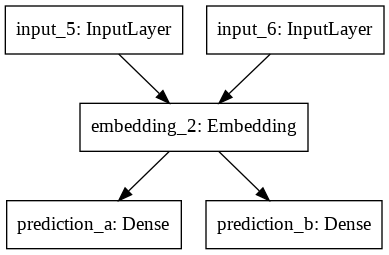

In [71]:
from PIL import Image
Image.open('/content/shared_model.png')

#Model Subclassing :
- use only when you want to buid your own layers

In [0]:
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
class MyLayer(layers.Layer):
  def __init__(self, output_dim, **kwargs):
    self.output_dim = output_dim
    super(MyLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    self.kernel = self.add_weight(name='kernel',shape=(input_shape[1], self.output_dim),
                                  initializer='uniform',trainable=True)
  

  def call(self, inputs):
# Do the multiplication and return
    return tf.matmul(inputs, self.kernel)

In [0]:
model = tf.keras.Sequential([MyLayer(20),
                             layers.Activation('softmax')])